Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
import statsmodels.api as sm
import patsy as pt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from math import sqrt

# Задача 3.5

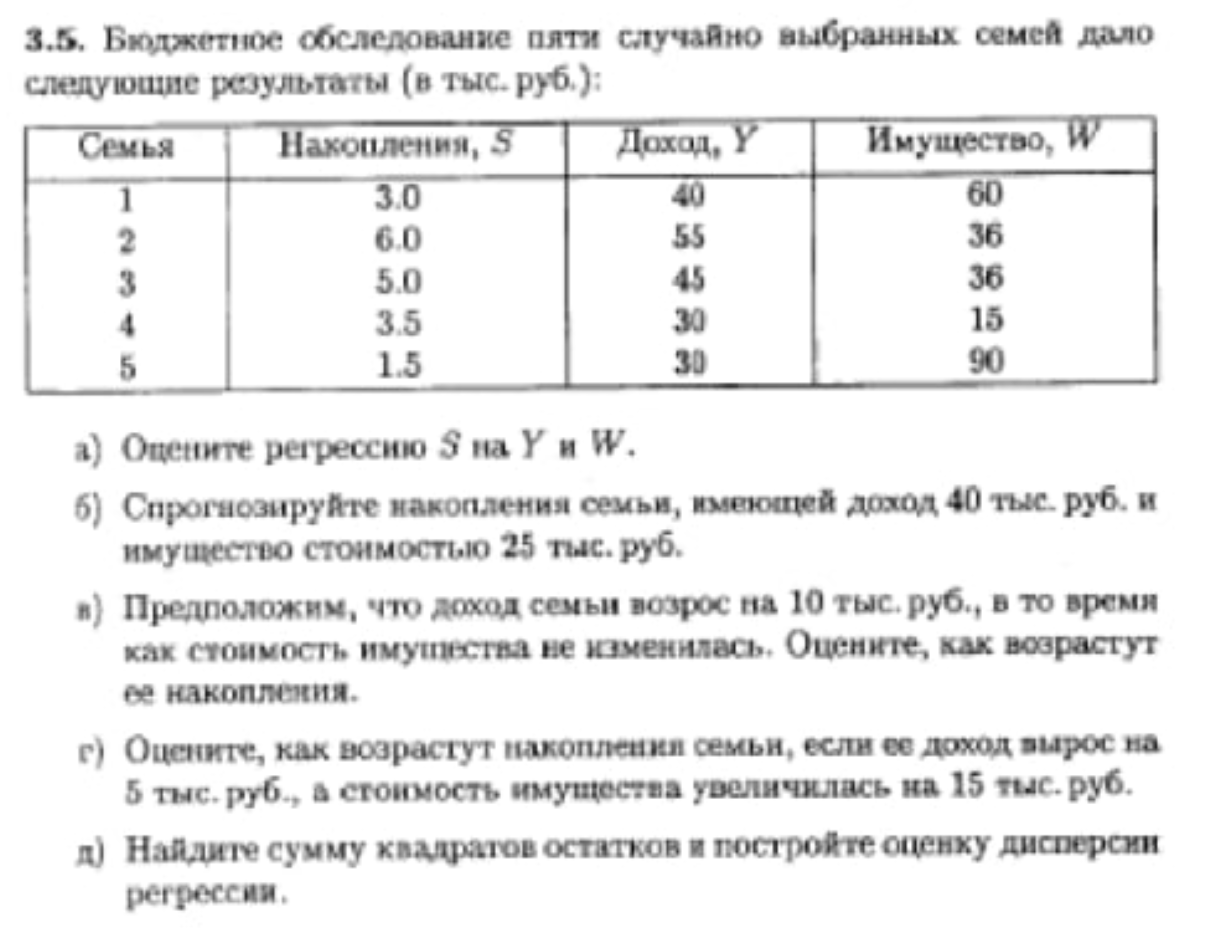

In [2]:
Image("./Доп задача 3.5.png")

## Пункт а)

Уравнение регрессии будем искать в виде: y = $\alpha$ + $\beta_1*x_1$ + $\beta_2*x_2$

Тогда мы можем записать такие матрицы: $ Y = \begin{pmatrix}
3\\
6\\
5\\
3,5\\
1,5\\
\end{pmatrix} $,      $ X = \begin{pmatrix}
40&60\\
55&36\\
45&36\\
30&15\\
30&90\\
\end{pmatrix} $

In [3]:
data = pd.read_excel('Доп задача 3.5.xlsx', 'ДопЗадача')[['Доходы', 'Имущество', 'Накопления']]
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
data.head()

,Доходы,Имущество,Накопления
0,40,60,3.0
1,55,36,6.0
2,45,36,5.0
3,30,15,3.5
4,30,90,1.5


Построение регрессии

In [4]:
# Создаём пустую форму регрессии
skm = lm.LinearRegression()
# Вычисляем параметры
skm.fit(x, y)
# Отображение коэфициентов
skm.intercept_, skm.coef_


f'y = {skm.coef_[0]}*[Доходы] + {skm.coef_[1]}*[Имущество] + {skm.intercept_}'

'y = 0.12287912666052875*[Доходы] + -0.02940725152352142*[Имущество] + 0.27873865579376567'

В результате получаем неизвестные коэфициенты в уравнении: y = 0.12$*$[Доходы] - 0.03$*$[Имущество] + 0.28



## Пункт б)

По условию задачи:

\begin{equation*}
 \begin{cases}
   [Доходы] = 40  тыс.руб \\
   [Имущество] = 25  тыс.руб
 \end{cases}
\end{equation*}

Тогда просто подставим эти значения в полученную в прошлом пункте регрессию:

In [5]:
print('[Прогнозируемые накопления] =',round(0.12287912666052875*40 -0.02940725152352142*25 + 0.27873865579376567, 1))

[Прогнозируемые накопления] = 4.5


## Пункт в)

Продолжаем игры с уравнением регрессии. Предположим, что доход семьи возрос на $\delta$, в то время как стоимость имущества осталась постоянной. Тогда запишем сиситему:

\begin{equation*}
 \begin{cases}
   y_1 = \alpha + \beta_1*x_1 + \beta_2*x_2 \\
   y_2 = \alpha + \beta_1*(x_1+\delta) + \beta_2*x_2
 \end{cases}
\end{equation*}

Выразим: $\alpha +\beta_2*x_2=y_1-\beta_1*x_1=y_2-\beta_1*(x_1+\delta)$. 

Тогда оценим дельту: $y_2-y_1=\beta_1*x_1-\beta_1*(x_1+\delta)=\beta_1*x_1-\beta_1*x_1+\beta_1*\delta=\beta_1*\delta$

Подставим $\delta =$ 10 тыс.руб

In [6]:
print('В итоге получаем, что y2−y1 =',round(0.12287912666052875*10, 1),'тыс.руб')

В итоге получаем, что y2−y1 = 1.2 тыс.руб


## Пункт г)

Из предыдущего пункта заметим, что вклад прироста любой из переменных в накопления складывается из прироста, умноженного на соответствующий коэффициентов регрессии. Тогда просто посчитаем:

In [7]:
print('Получаем, что y2−y1 =',round(0.12287912666052875*5-0.02940725152352142*15, 1),'тыс.руб')

Получаем, что y2−y1 = 0.2 тыс.руб


## Пункт д)

По найденному уравнению регрессии определим теоретические значения результирующего признака (Накопления):

In [8]:
data = pd.read_excel('Доп задача 3.5.xlsx', 'ДопЗадача')[['Доходы', 'Имущество', 'Накопления']]
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
data.rename(columns={'Доходы': 'x1', 'Имущество': 'x2', 'Накопления': 'y'}, inplace=True)
data['y_теор'] = 0.12287912666052875*data['x1'] -0.02940725152352142*data['x2'] + 0.27873865579376567
data['e'] = data['y'] - data['y_теор']
data['e^2'] = data['e']**2

data.head()

,x1,x2,y,y_теор,e,e^2
0,40,60,3.0,3.429469,-0.429469,0.184443
1,55,36,6.0,5.978430,0.021570,0.000465
2,45,36,5.0,4.749638,0.250362,0.062681
3,30,15,3.5,3.524004,-0.024004,0.000576
4,30,90,1.5,1.318460,0.181540,0.032957


Сумма квадратов остатков можно рассчитать по формуле: $\sum (y_i - y_{i_.теор})^2 = \sum e_i^2$

In [9]:
print('Сумма квадратов остатков: ',data['e^2'].sum())

Сумма квадратов остатков:  0.2811225831908453


Остаточную дисперсию можно рассчитать по формуле: $\sigma = \sqrt{\sigma^2} = \sqrt{\frac{\sum (y_i - y_{i_.теор})^2}{n}} = \sqrt{\frac{\sum e_i^2}{n}}$

In [10]:
print('Остаточная дисперсия: ',sqrt(data['e^2'].sum()/5))

Остаточная дисперсия:  0.2371170947826602
